# Prepare ISIC dataset
The result of this preparation is used in [ISIC2018DatasetFast](https://github.com/NITR098/Awesome-U-Net/blob/72a672728376cc08c62df66df6ed8b90b329667f/datasets/isic.py#L85).

In [1]:
# !pip install torchvision==0.14.0

In [2]:
import glob,os
from tqdm import tqdm
import numpy as np
from torchvision import transforms, utils
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode

In [3]:
# Parameters
INPUT_SIZE = 224

# transform for image
img_transform = transforms.Compose([
    transforms.Resize(
        size=[INPUT_SIZE, INPUT_SIZE], 
        interpolation=transforms.functional.InterpolationMode.BILINEAR
    ),
])
# transform for mask
msk_transform = transforms.Compose([
    transforms.Resize(
        size=[INPUT_SIZE, INPUT_SIZE], 
        interpolation=transforms.functional.InterpolationMode.NEAREST
    ),
])

# preparing input info.
data_prefix = "ISIC_"
target_postfix = "_segmentation"
target_fex = "png"
input_fex = "jpg"
data_dir = "/raid/home/labusermodaresi/datasets/ISIC2018"
imgs_dir = os.path.join(data_dir, "ISIC2018_Task1-2_Training_Input")
msks_dir = os.path.join(data_dir, "ISIC2018_Task1_Training_GroundTruth")

img_dirs = glob.glob(f"{imgs_dir}/*.{input_fex}")
data_ids = [d.split(data_prefix)[1].split(f".{input_fex}")[0] for d in img_dirs]


def get_img_by_id(id):
    img_dir = os.path.join(imgs_dir, f"{data_prefix}{id}.{input_fex}")
    img = read_image(img_dir, ImageReadMode.RGB)
    return img

def get_msk_by_id(id):
    msk_dir = os.path.join(msks_dir, f"{data_prefix}{id}{target_postfix}.{target_fex}")
    msk = read_image(msk_dir, ImageReadMode.GRAY)
    return msk

# gathering images
imgs = []
msks = []
for data_id in tqdm(data_ids):
    img = get_img_by_id(data_id)
    msk = get_msk_by_id(data_id)

    if img_transform:
        img = img_transform(img)
        img = (img - img.min())/(img.max() - img.min())
    if msk_transform:
        msk = msk_transform(msk)
        msk = (msk - msk.min())/(msk.max() - msk.min())
        
    img = img.numpy()
    msk = msk.numpy()
    
    imgs.append(img)
    msks.append(msk)

100%|██████████| 2594/2594 [05:37<00:00,  7.69it/s]


In [6]:
X = np.array(imgs)
Y = np.array(msks)
!mkdir -p /raid/home/labusermodaresi/datasets/ISIC2018/np/
np.save(f"/raid/home/labusermodaresi/datasets/ISIC2018/np/X_tr_224x224", X)
np.save(f"/raid/home/labusermodaresi/datasets/ISIC2018/np/Y_tr_224x224", Y)

In [ ]:
!ls /path/to/datasets/ISIC2018/np

### Visualization

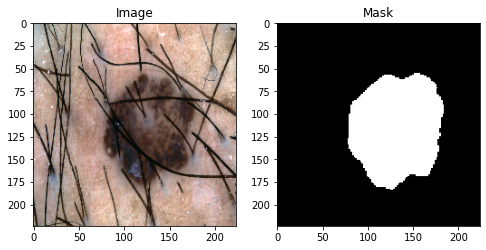

In [23]:
import sys
sys.path.append('..')
from utils import show_sbs
import random
i=int(random.random()*len(X) )
show_sbs(X[i], Y[i])